# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives

Here’s the mystery we’re going to solve: **<span class="mark">which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?</span>**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Springboard-Data-Science-Career-Track-Unit-4-Challenge---Tier-3-Complete" data-toc-modified-id="Springboard-Data-Science-Career-Track-Unit-4-Challenge---Tier-3-Complete-1">Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete</a></span><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.1">Objectives</a></span></li><li><span><a href="#The-Data-Science-Pipeline" data-toc-modified-id="The-Data-Science-Pipeline-1.2">The Data Science Pipeline</a></span><ul class="toc-item"><li><span><a href="#Sourcing-and-Loading" data-toc-modified-id="Sourcing-and-Loading-1.2.1">Sourcing and Loading</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-General-Settings" data-toc-modified-id="Importing-Libraries-and-General-Settings-1.2.1.1">Importing Libraries and General Settings</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1.2.1.2">Loading the data</a></span></li></ul></li><li><span><a href="#Cleaning,-transforming,-and-visualizing" data-toc-modified-id="Cleaning,-transforming,-and-visualizing-1.2.2">Cleaning, transforming, and visualizing</a></span></li></ul></li><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data-1.3">Visualizing the data</a></span><ul class="toc-item"><li><span><a href="#Barnet-Plot" data-toc-modified-id="Barnet-Plot-1.3.1">Barnet Plot</a></span><ul class="toc-item"><li><span><a href="#Adding-a-Linear-Regression-to-the-Barnet-Plot" data-toc-modified-id="Adding-a-Linear-Regression-to-the-Barnet-Plot-1.3.1.1">Adding a Linear Regression to the Barnet Plot</a></span></li></ul></li><li><span><a href="#An-exploration-of-slicing,-and-refitting-for-Barnet-borough" data-toc-modified-id="An-exploration-of-slicing,-and-refitting-for-Barnet-borough-1.3.2">An exploration of slicing, and refitting for Barnet borough</a></span></li><li><span><a href="#Camden-Plot" data-toc-modified-id="Camden-Plot-1.3.3">Camden Plot</a></span></li><li><span><a href="#Westminster-Plot" data-toc-modified-id="Westminster-Plot-1.3.4">Westminster Plot</a></span></li></ul></li></ul></li><li><span><a href="#Answering-the-Q:-which-boroughs-have-seen-the-greatest-price-increases?" data-toc-modified-id="Answering-the-Q:-which-boroughs-have-seen-the-greatest-price-increases?-2">Answering the Q: which boroughs have seen the greatest price increases?</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-relative-price-increases" data-toc-modified-id="Visualizing-the-relative-price-increases-2.1">Visualizing the relative price increases</a></span></li><li><span><a href="#Plotting-the-borough-with-the-highest-price-increase:-Kensington-&amp;-Chelsea" data-toc-modified-id="Plotting-the-borough-with-the-highest-price-increase:-Kensington-&amp;-Chelsea-2.2">Plotting the borough with the highest price increase: Kensington &amp; Chelsea</a></span></li><li><span><a href="#Plotting-the-borough-with-the-lowest-price-increase:-Barking-&amp;-Dagenham" data-toc-modified-id="Plotting-the-borough-with-the-lowest-price-increase:-Barking-&amp;-Dagenham-2.3">Plotting the borough with the lowest price increase: Barking &amp; Dagenham</a></span></li><li><span><a href="#Plots-of-selected-boroughs-in-a-single-chart" data-toc-modified-id="Plots-of-selected-boroughs-in-a-single-chart-2.4">Plots of selected boroughs in a single chart</a></span></li><li><span><a href="#Plot-all-of-the-Boroughs-in-one-chart" data-toc-modified-id="Plot-all-of-the-Boroughs-in-one-chart-2.5">Plot all of the Boroughs in one chart</a></span></li><li><span><a href="#Important-Note" data-toc-modified-id="Important-Note-2.6">Important Note</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.7">Conclusion</a></span></li></ul></li></ul></div>

## The Data Science Pipeline

### Sourcing and Loading 

#### Importing Libraries and General Settings

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import datetime as dt
from sklearn.linear_model import LinearRegression

# Extra magic
%matplotlib inline
plt.rcParams['figure.dpi']=110
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf','svg')

pd.options.display.float_format = '{:.2f}'.format  # clean up float formatting

sns.set_style("darkgrid")
sns.set()


# @TODO: remove this for day-mode
# plt.style.use("dark_background")


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    margin-left: 80px;
}
</style>
""")


# plt tick formatter
gbp_tick = mtick.StrMethodFormatter('£{x:,.0f}')
def format_ticks():
    """Formats Date vs Price Ticks (in matplotlib)"""
    
    plt.xlabel('Date')
    plt.ylabel('Price in GBP')

    # format ytick
    ax=plt.gca()
    ax.yaxis.set_major_formatter(gbp_tick) 
    

# utility - linear regression
def get_linregr_pred (df: pd.DataFrame) -> np.ndarray:
    """Return a linear regression prediction model from a DataFrame
    
    Keyword Arguments:
    df -- A DataFrame with 'Date' and 'Avg Price' columns, holding datetime objects and integer prices
    """
    # @TODO: Assert 'Date' and 'Avg Price' columns with datetime and float elements - throw TypeError
    
    # format the data into ndarrays
    x_arr = df['Date'].map(dt.datetime.toordinal).values.reshape(-1,1)
    y_arr = df['Avg Price'].values.reshape(-1,1)
    
    # create a linear regression
    linear_regressor = LinearRegression()  
    linear_regressor.fit(x_arr, y_arr)  # fit the model
    y_arr_pred = linear_regressor.predict(x_arr)
    
    return y_arr_pred

#### Loading the data
Data source: [London Datastore](https://data.london.gov.uk/)

In [8]:
pd.__version__

'1.1.2'

In [6]:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None, parse_dates=True)

### Cleaning, transforming, and visualizing

**Exploring the data** 

In [7]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,nan,E92000001
1,1995-01-01,91448.98,50460.23,93284.52,64958.09,71306.57,81671.48,120932.89,69158.16,79885.89,...,43958.48,44803.43,45544.52,48527.52,56701.60,74435.76,64018.88,54705.16,nan,53202.77
2,1995-02-01,82202.77,51085.78,93190.17,64787.92,72022.26,81657.56,119508.86,68951.10,80897.07,...,43925.42,44528.81,46051.57,49341.29,56593.59,72777.94,63715.02,54356.15,nan,53096.15
3,1995-03-01,79120.70,51268.97,92247.52,64367.49,72015.76,81449.31,120282.21,68712.44,81379.86,...,44434.87,45200.47,45383.82,49442.18,56171.18,73896.84,64113.61,53583.08,nan,53201.28
4,1995-04-01,77101.21,53133.51,90762.87,64277.67,72965.63,81124.41,120097.90,68610.05,82188.90,...,44267.78,45614.34,46124.23,49455.93,56567.90,74455.29,64623.22,54786.02,nan,53590.85


In [5]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
301,2020-01-01,747610.87,303653.40,518542.25,334765.06,423160.84,435532.43,815512.46,371226.72,466490.65,...,165093.52,164752.36,196199.08,202084.82,290334.93,478489.13,323421.57,257822.15,nan,248950.46
302,2020-02-01,777640.01,304265.15,519121.24,337759.69,467144.91,435704.45,825249.40,371356.53,465613.85,...,166290.98,164949.21,194213.96,200196.37,290308.73,479628.13,319827.02,257101.38,nan,248231.66
303,2020-03-01,844988.51,304098.64,527747.37,339215.32,461397.54,434624.83,870106.85,370871.54,478565.23,...,168160.92,165684.57,198283.71,201368.71,291355.54,488184.74,326700.98,262444.14,nan,251538.79
304,2020-04-01,867840.63,283139.44,526552.50,346839.54,494454.52,443481.92,870626.76,386737.93,502107.07,...,167808.52,165561.19,200513.17,202093.37,295639.93,480425.39,327412.72,255891.14,nan,250873.98
305,2020-05-01,899831.21,295743.76,532503.04,339407.76,466573.65,420036.02,862209.00,369790.79,490595.92,...,168261.16,170198.01,197504.59,203658.15,290620.98,479018.01,324658.72,261006.22,nan,251972.52


In [6]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.00,0.00,0.00
mean,nan,nan,nan
std,nan,nan,nan
min,nan,nan,nan
25%,nan,nan,nan
50%,nan,nan,nan
75%,nan,nan,nan
max,nan,nan,nan


In [7]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            305 non-null    datetime64[ns]
 1   City of London        306 non-null    object        
 2   Barking & Dagenham    306 non-null    object        
 3   Barnet                306 non-null    object        
 4   Bexley                306 non-null    object        
 5   Brent                 306 non-null    object        
 6   Bromley               306 non-null    object        
 7   Camden                306 non-null    object        
 8   Croydon               306 non-null    object        
 9   Ealing                306 non-null    object        
 10  Enfield               306 non-null    object        
 11  Greenwich             306 non-null    object        
 12  Hackney               306 non-null    object        
 13  Hammersmith & Fulham

**Cleaning the data**

In [8]:
props_tp = properties.transpose()
props_tp.iloc[0:5,0:8].head()  # props_tp.head()

,0,1,2,3,4,5,6,7
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00
City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51,110128.04
Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35,52113.12
Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23,91441.25
Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32,63722.70


In [9]:
# set the column labels
props_tp.columns = props_tp.iloc[0].rename('Date')
props_tp.iloc[0:5,0:8].head()  # props_tp.head()

Date,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00
City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51,110128.04
Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35,52113.12
Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23,91441.25
Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32,63722.70


In [10]:
# drop the first row which we turned into column labels but are not values.
props_tp = props_tp.reset_index().drop(0)
props_tp.iloc[0:5,0:8].head()  # props_tp.head()

Date,index,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00
1,City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51
2,Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35
3,Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23
4,Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32
5,Brent,E09000005,71306.57,72022.26,72015.76,72965.63,73704.05,74310.48


**Cleaning the data (part 2)**

In [11]:
# Clean up the column names
props_tp_rn = props_tp.rename(columns={'index':'London Borough',
                                       pd.NaT:'ID'})
props_tp_rn.iloc[0:5,0:2]  # head()

Date,London Borough,ID
1,City of London,E09000001
2,Barking & Dagenham,E09000002
3,Barnet,E09000003
4,Bexley,E09000004
5,Brent,E09000005


**Transforming the data**

In [12]:
# Getting rid of the extraneous rows (and NaNs) is easier if we do it
#    BEFORE we melt the frame 
# We notice that the first row is not a borough.  
# Neither are the last 14 rows
props_clean = props_tp_rn.iloc[1:33].reset_index(drop=True)

# Sanity check
props_clean.describe()
# props_clean.iloc[:,0:8].describe()

Date,London Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
count,32,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,...,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
unique,32,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,...,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
top,Merton,E09000025,76287.57,111103.04,72190.44,106875.00,69759.22,79956.36,124027.58,73275.17,...,364540.25,515391.04,367101.78,450108.59,365885.57,526270.04,499775.43,379836.68,508543.07,513215.59
freq,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [13]:
# Melt and rename
df = props_clean.melt(id_vars=['London Borough', 'ID'] ,value_name='Avg Price', )
df.head()

,London Borough,ID,Date,Avg Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.23
1,Barnet,E09000003,1995-01-01,93284.52
2,Bexley,E09000004,1995-01-01,64958.09
3,Brent,E09000005,1995-01-01,71306.57
4,Bromley,E09000006,1995-01-01,81671.48


**Check the datatypes**

In [14]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London Borough  9760 non-null   object        
 1   ID              9760 non-null   object        
 2   Date            9760 non-null   datetime64[ns]
 3   Avg Price       9760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 305.1+ KB


In [15]:
# cast the avg price column to floating point
df['Avg Price'] = df['Avg Price'].apply(float)

In [16]:
# checking datatype modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London Borough  9760 non-null   object        
 1   ID              9760 non-null   object        
 2   Date            9760 non-null   datetime64[ns]
 3   Avg Price       9760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 305.1+ KB


In [17]:
df.head()

,London Borough,ID,Date,Avg Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.23
1,Barnet,E09000003,1995-01-01,93284.52
2,Bexley,E09000004,1995-01-01,64958.09
3,Brent,E09000005,1995-01-01,71306.57
4,Bromley,E09000006,1995-01-01,81671.48


**Cleaning the data (part 3)**

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [18]:
# We cleaned it earlier!
df.loc[:,df.isnull().any()]  # Proof

""
0
1
2
3
4
...
9755
9756
9757
9758


## Visualizing the data

Subsetting and performing EDA on a single borough - Barnet

In [19]:
barnet = df[df['London Borough'] == 'Barnet']
barnet.head()

,London Borough,ID,Date,Avg Price
1,Barnet,E09000003,1995-01-01,93284.52
33,Barnet,E09000003,1995-02-01,93190.17
65,Barnet,E09000003,1995-03-01,92247.52
97,Barnet,E09000003,1995-04-01,90762.87
129,Barnet,E09000003,1995-05-01,90258.00


### Barnet Plot

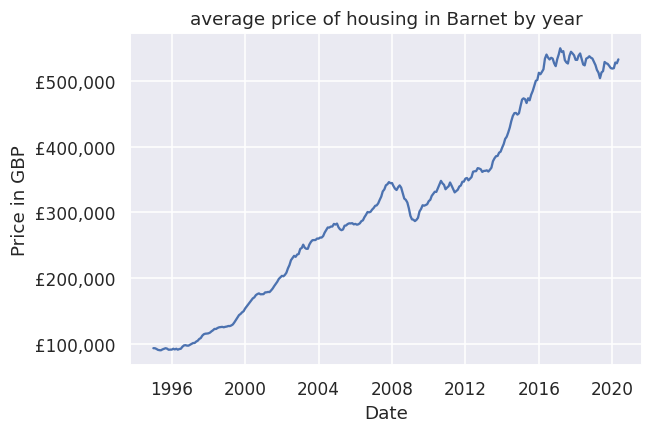

In [20]:
plt.plot(barnet['Date'], barnet['Avg Price'])
plt.title("average price of housing in Barnet by year")

format_ticks()
plt.show()

#### Adding a Linear Regression to the Barnet Plot

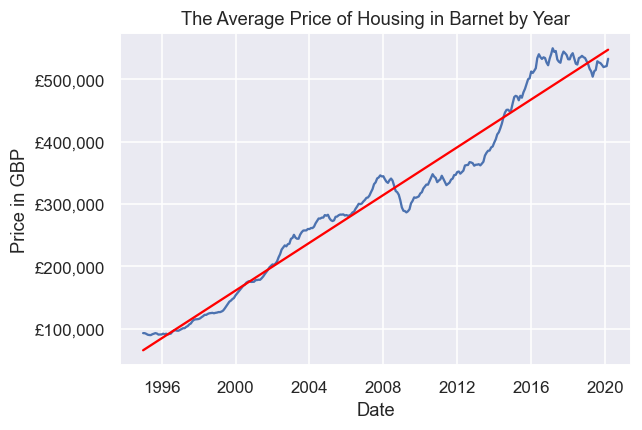

In [20]:
# The previous plot looks pretty linear --> Linear Regression?

# basic line plot for Barnet
plt.plot(barnet['Date'], barnet['Avg Price'])

# add a linear regression
y_barnet_pred = get_linregr_pred(barnet)
plt.plot(barnet['Date'], y_barnet_pred, color='red')

plt.title("The Average Price of Housing in Barnet by Year")
format_ticks()
plt.show()

### An exploration of slicing, and refitting for Barnet borough

The linear relationship seems pretty dominant over the 1995-2008 period.
2008 was the year of "housing crisis"
After this, there was a period of recovery up until around 2016 where there's a new horizontal oscillation.

Here we explore the "before" and "after" 2008

##### Barnet - Pre 2008

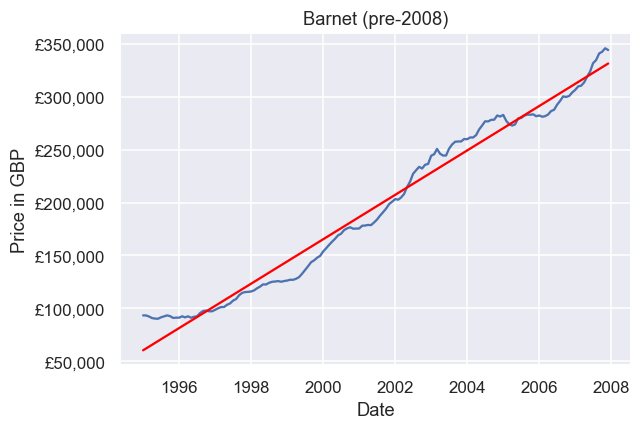

In [21]:
# An exploration of slicing, and refitting for Barnet borough
# Pre 2008 housing crisis

barnet9508 = barnet[barnet['Date'] < '2008']

# basic line plot for Barnet up to 2008
plt.plot(barnet9508['Date'], barnet9508['Avg Price'])

# Add a linear regression
y_barnet_pred = get_linregr_pred(barnet9508)
plt.plot(barnet9508['Date'], y_barnet_pred, color='red')

plt.title("Barnet (pre-2008)")
format_ticks()
plt.show()


##### Barnet - Post 2008

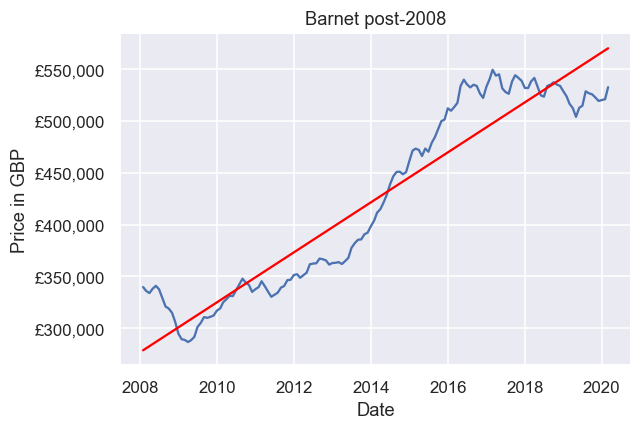

In [22]:
# An exploration of slicing, and refitting for Barnet borough
# post 2008 housing crisis

barnet08on = barnet[barnet['Date'] > '2008']

# basic line plot for Barnet from 2008 on
plt.plot(barnet08on['Date'], barnet08on['Avg Price'])

# Add a linear regression
y_barnet_pred = get_linregr_pred(barnet08on)
plt.plot(barnet08on['Date'], y_barnet_pred, color='red')

plt.title("Barnet post-2008")
format_ticks()
plt.show()

### Camden Plot

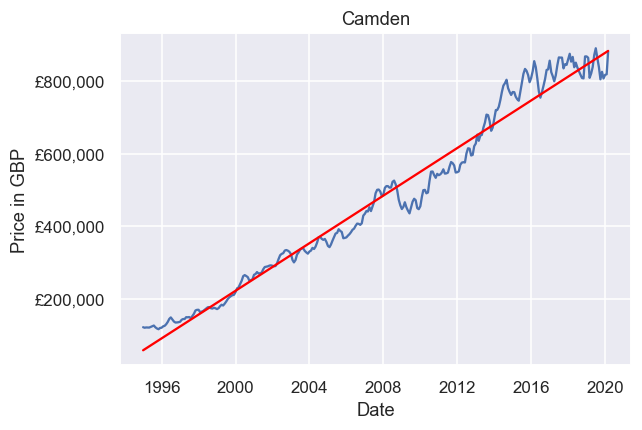

In [23]:
# subset for Camden
camden = df[df['London Borough'] == 'Camden']

# basic line plot for Camden
plt.plot(camden['Date'], camden['Avg Price'])

# Add a linear Regression 
ycamden_pred = get_linregr_pred(camden)
plt.plot(camden['Date'], ycamden_pred, color='red')

plt.title("Camden")
format_ticks()
plt.show()


### Westminster Plot

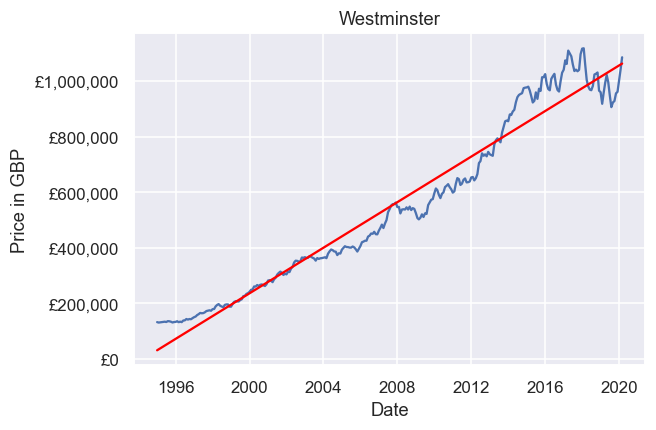

In [24]:
# subset for Westminster
westminster = df[df['London Borough'] == 'Westminster']

# basic line plot for Westminster
plt.plot(westminster['Date'], westminster['Avg Price'])

# Add a linear Regression 
ywestminster_pred = get_linregr_pred(westminster)
plt.plot(westminster['Date'], ywestminster_pred, color='red')

plt.title("Westminster")
format_ticks()
plt.show()

# Answering the Q: which boroughs have seen the greatest price increases?

We can answer this question by fitting a linear regression line to each borough and sorting the coefficient of each line.  The lines with the largest coefficient values will have the greatest relative price increase.

In [25]:
# Loop and check the regression coefficient for each borough and get the maximum one.
# The max coefficient = greatest avg rate of change --> highest average delta price

dfc = pd.DataFrame()  # DataFrame with Coefficients

# loop over unique boroughs

for b in df['London Borough'].unique():
    
    # subset the borough from the main df
    df_sub = df[df['London Borough'] == b]
    
    # reshape the data for LR
    Xsub = df_sub['Date'].map(dt.datetime.toordinal).values.reshape(-1,1)
    Ysub = df_sub['Avg Price'].values.reshape(-1,1)
    
    # fit the linear regressor
    regr = LinearRegression().fit(Xsub, Ysub)
    
    # generate a dataframe of coefficents
    dfc[b] = regr.coef_[0]
    
# reshape and label the dataframe
dfcm = dfc.melt()
dfcm.columns = ['London Borough', 'regr coef']

#sort the dataframe by coefficients aka growth rate
dfcm = dfcm.sort_values('regr coef', ascending=False)

print('\n\nThe London Borough that showed the highest average growth ' +
      f'between 1996 and 2020 is: {dfcm.iloc[0,0]}\n\n' +
     'The top 5 are listed below:\n')


dfcm.head()




The London Borough that showed the highest average growth between 1996 and 2020 is: Kensington & Chelsea

The top 5 are listed below:



,London Borough,regr coef
18,Kensington & Chelsea,146.72
31,Westminster,112.12
5,Camden,89.84
11,Hammersmith & Fulham,79.16
17,Islington,69.13


## Visualizing the relative price increases
By plotting the coefficients, we can visually assess the relative performance of each borough in regard to potential profit over time.

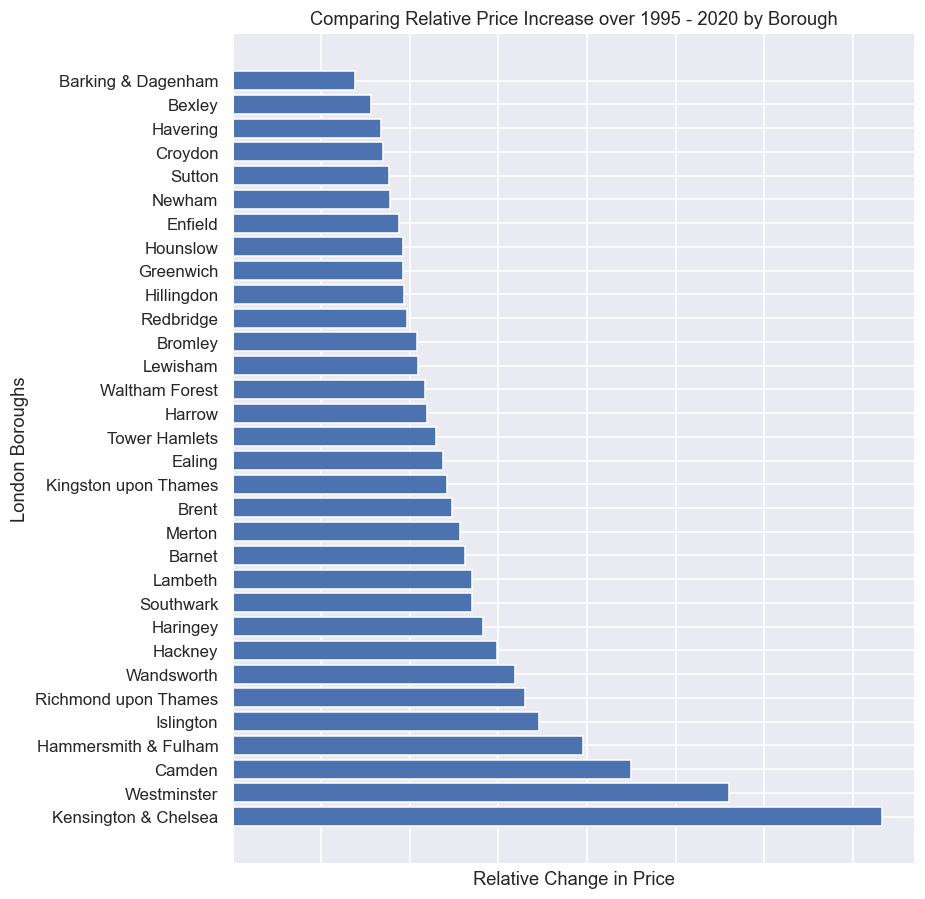

In [26]:
# generate a horizontal bar plot to visualize the delta price

fig, ax = plt.subplots(figsize=(8,10))

ypos = np.arange(len(dfcm))
ax.barh(ypos, dfcm['regr coef'])

# remove the xticks because the actual coef value is not useful
plt.tick_params(axis='x', labelbottom=False)

ax.set_xlabel('Relative Change in Price')
ax.set_ylabel('London Boroughs')
ax.set_yticks(ypos)
ax.set_yticklabels(dfcm['London Borough'])

plt.title(f"Comparing Relative Price Increase over {df['Date'].min().year} - {df['Date'].max().year} by Borough")
plt.show()

## Plotting the borough with the highest price increase: Kensington & Chelsea

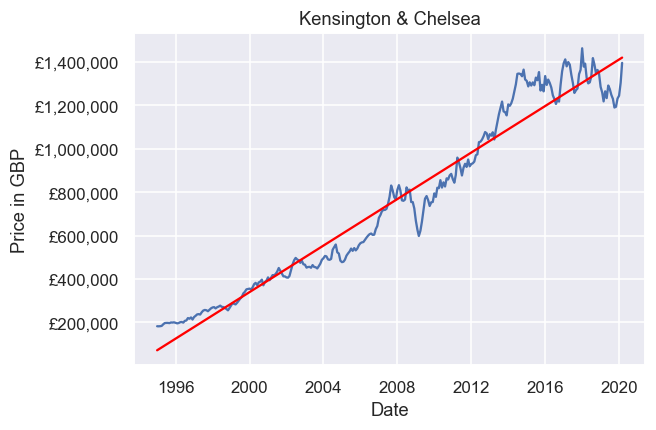

In [27]:
# subset for Kensington & Chelsea (the highest avg price increase)
kensington = df[df['London Borough'] == 'Kensington & Chelsea']

# basic line plot for Kensington & Chelsea
plt.plot(kensington['Date'], kensington['Avg Price'])

# Add a linear Regression 
ykensington_pred = get_linregr_pred(kensington)
plt.plot(kensington['Date'], ykensington_pred, color='red')

plt.title("Kensington & Chelsea")
format_ticks()
plt.show()

## Plotting the borough with the lowest price increase: Barking & Dagenham

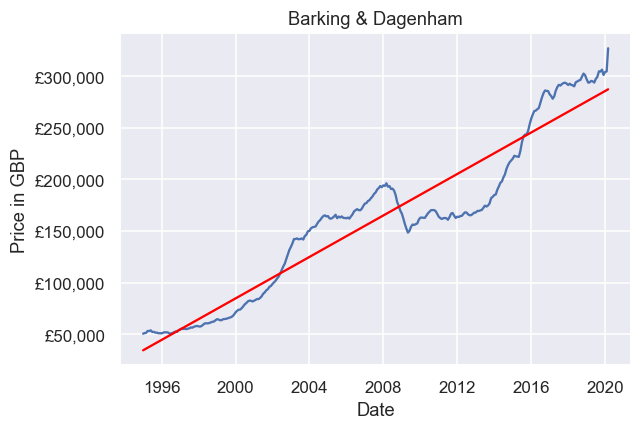

In [28]:
# subset for Barking & Dagenham (the lowest avg price increase)
barking = df[df['London Borough'] == 'Barking & Dagenham']

# basic line plot for Barking & Dagenham
plt.plot(barking['Date'], barking['Avg Price'])

# Add a linear Regression 
ybarking_pred = get_linregr_pred(barking)
plt.plot(barking['Date'], ybarking_pred, color='red')

plt.title("Barking & Dagenham")
format_ticks()
plt.show()

## Plots of selected boroughs in a single chart

A visual comparison between the price performance of some boroughs, including the highest earning and lowest earning.  Having the data in one chart, with the scale being equal, allows us visually compare all boroughs along with their slope.

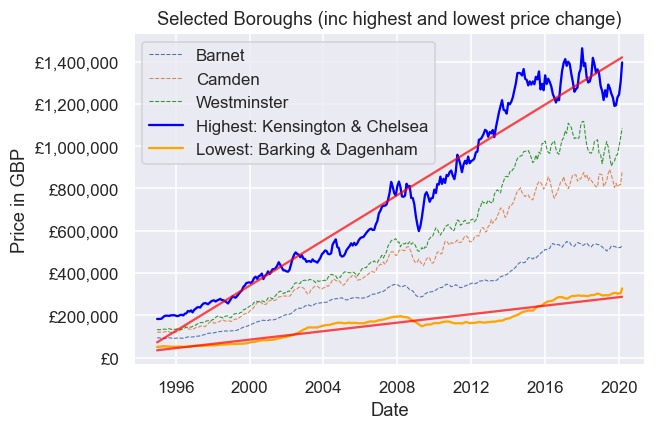

In [29]:
# Semi-randomly picked boroughs
plt.plot(barnet['Date'], barnet['Avg Price'], label='Barnet', linewidth=0.7, linestyle='--')
plt.plot(camden['Date'], camden['Avg Price'], label='Camden', linewidth=0.7, linestyle='--')
plt.plot(westminster['Date'], westminster['Avg Price'], label='Westminster', \
         color='green', linewidth=0.7, linestyle='--', alpha=0.8)

# Highest Price Change
plt.plot(kensington['Date'], kensington['Avg Price'], label='Highest: Kensington & Chelsea', color='blue')
plt.plot(kensington['Date'], ykensington_pred, color='red', alpha=0.8)

#Lowest Price Change
plt.plot(barking['Date'], barking['Avg Price'], label='Lowest: Barking & Dagenham', color='orange')
plt.plot(barking['Date'], ybarking_pred, color='red', alpha=0.8)


plt.title("Selected Boroughs (inc highest and lowest price change)")
plt.legend(loc='upper left')
format_ticks()
plt.show()

## Plot all of the Boroughs in one chart

Regression lines have been provided for 'Kensington & Chelsea' as well as 'Barking & Dagenham', respectively representing the highest and lowest average increase in price.

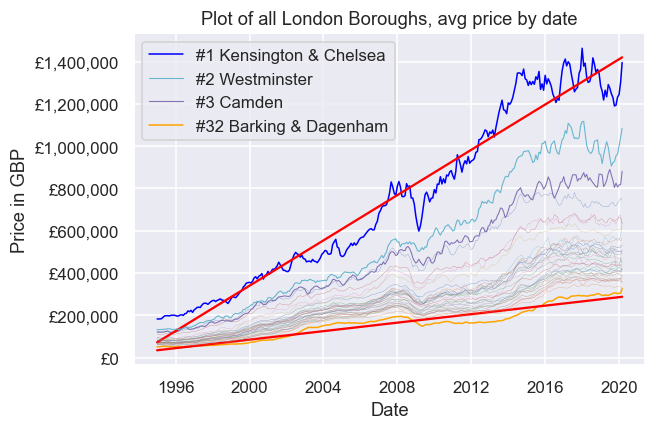

In [30]:
# Loop over and plot all of the boroughs together

for b in df['London Borough'].unique():
    
    # subset the borough from the main df
    df_sub = df[df['London Borough'] == b]
    
    # fit the linear regressor for the highest and lowest positive delta price
    # @TODO: remove the hard-coding
    if b == 'Kensington & Chelsea':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=1, color='blue', label='#1 '+b)                
        ydfsub_pred = get_linregr_pred(df_sub)  
        plt.plot(df_sub['Date'], ydfsub_pred, color='red')
        
    elif b == 'Barking & Dagenham':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=1, color='orange', label='#32 '+b)
        ydfsub_pred = get_linregr_pred(df_sub)  
        plt.plot(df_sub['Date'], ydfsub_pred, color='red') 
        
    elif b == 'Westminster':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.7, label='#2 '+b)
        
    elif b == 'Camden':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.7, label='#3 '+b)
        
    else:
        # plot the other boroughs without a regression line
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.2, alpha=0.8)



plt.title("Plot of all London Boroughs, avg price by date")

# re-sort the legend for readability @TODO: sort programmatically
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
labels = [labels[2], labels[3], labels[1], labels[0]]
handles = [handles[2], handles[3], handles[1], handles[0]]
ax.legend(handles, labels, loc='upper left')

format_ticks()
plt.show()

## Important Note

It should be noted that the regression line for 'Kensington & Chelsea' fits poorly at the beginning of the dataset.  Therefore, any investment made in 1995 or 1996 would clearly underperform relative to the model by about £150k (constant) (or around 8-11% of the projected profit).

## Conclusion

From the charts, we can clearly see that Kensington & Chelsea homes have had the highest average increase in market value over the time frame (1995-2020)